# 🌸 Task 1 - Iris Flower Classification  

This is my first task as part of the **Oasis Infobyte Data Science Internship (Sep 2025)**.  

In this notebook, I will:  
- Explore the famous **Iris dataset**  
- Perform some **data analysis and visualization**  
- Train a few **machine learning models** to classify iris flowers  

**Author:** Manukonda Naresh  
**Role:** Data Science Intern (OIBSIP)  


In [2]:
# ---------------------------------------------------------------
# Importing all the basic Python libraries I will use in this task
# ---------------------------------------------------------------

# For numerical operations
import numpy as np  

# For handling datasets easily
import pandas as pd  

# For plotting and visualizations
import matplotlib.pyplot as plt  

# ---------------------------------------------------------------
# Importing Scikit-learn (sklearn) modules for ML
# ---------------------------------------------------------------

# Built-in datasets (I will use the iris dataset from here)
from sklearn import datasets  

# To split the data into training & testing
from sklearn.model_selection import train_test_split  

# For scaling features (important for some models like KNN, SVM)
from sklearn.preprocessing import StandardScaler  

# For evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

# Different ML algorithms I will try
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [3]:
# ---------------------------------------------------------------
# Loading the Iris dataset
# ---------------------------------------------------------------

# Sklearn already has the iris dataset, so I will directly use it
iris = datasets.load_iris()

# Converting the data into a pandas DataFrame for better readability
features = pd.DataFrame(iris.data, columns=iris.feature_names)   # independent variables
labels = pd.Series(iris.target, name='species')                  # target variable

# Let's quickly check the first few rows of data
print("🔹 Sample feature data:")
display(features.head())

print("🔹 Sample target values:")
display(labels.head())


🔹 Sample feature data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


🔹 Sample target values:


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [4]:
# ---------------------------------------------------------------
# Loading the Iris dataset
# ---------------------------------------------------------------

# Sklearn already has the iris dataset, so I will directly use it
iris = datasets.load_iris()

# Converting the data into a pandas DataFrame for better readability
features = pd.DataFrame(iris.data, columns=iris.feature_names)   # independent variables
labels = pd.Series(iris.target, name='species')                  # target variable

# Let's quickly check the first few rows of data
print("🔹 Sample feature data:")
display(features.head())

print("🔹 Sample target values:")
display(labels.head())


🔹 Sample feature data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


🔹 Sample target values:


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [5]:
# Quick EDA: shape, summary stats, class distribution
print("Dataset shape (rows, columns):", features.shape)
print("\nFeature names:", list(features.columns))
print("\n--- Summary statistics ---")
display(features.describe())
print("\n--- Class distribution (counts) ---")
display(labels.value_counts().sort_index())

# map target to species names
species_map = {i: name for i, name in enumerate(iris.target_names)}
print("\nSpecies map:", species_map)


Dataset shape (rows, columns): (150, 4)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

--- Summary statistics ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



--- Class distribution (counts) ---


species
0    50
1    50
2    50
Name: count, dtype: int64


Species map: {0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}


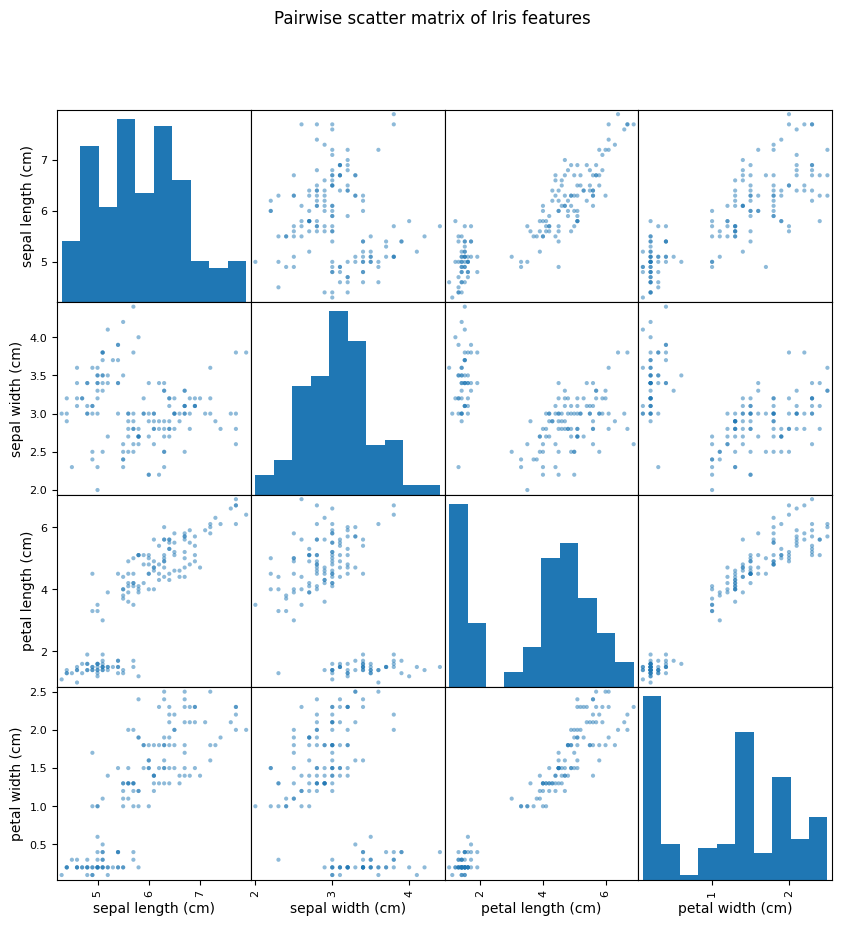

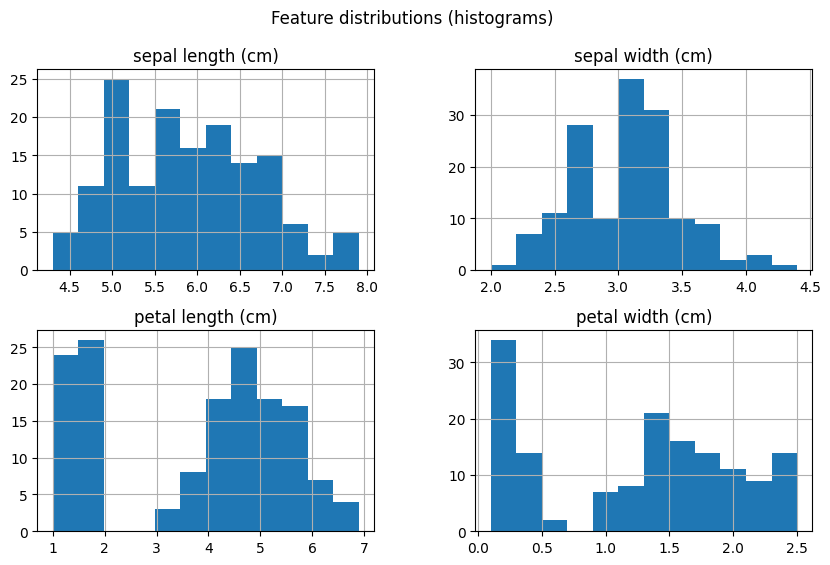

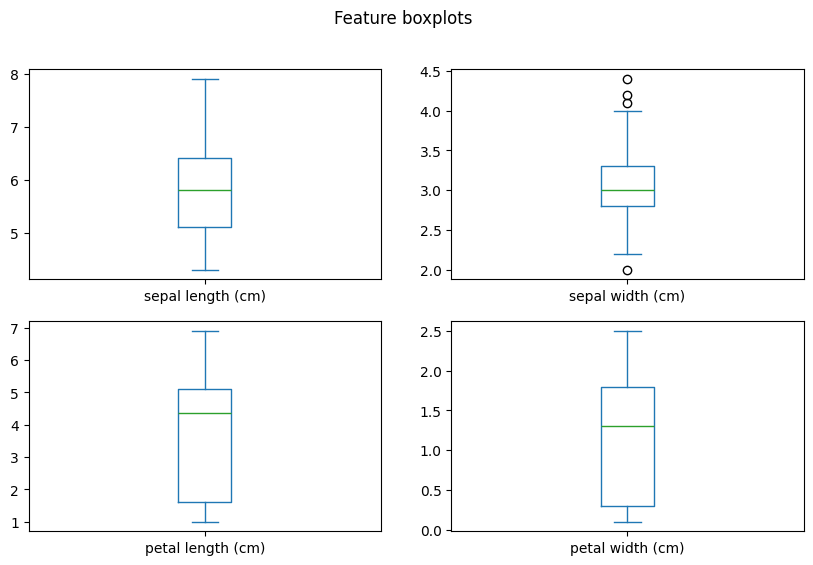

In [6]:
# Pairplot-like scatter matrix
pd.plotting.scatter_matrix(features, figsize=(10,10))
plt.suptitle('Pairwise scatter matrix of Iris features')
plt.show()

# Histograms
features.hist(bins=12, figsize=(10,6))
plt.suptitle('Feature distributions (histograms)')
plt.show()

# Boxplots
features.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,6))
plt.suptitle('Feature boxplots')
plt.show()


In [7]:
# Prepare features and labels
X = features.copy()
y = labels.copy()

# Stratified split to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train shape: (120, 4) Test shape: (30, 4)


In [8]:
# Train multiple baseline models and compare accuracy
models = {
    'LogisticRegression': LogisticRegression(max_iter=200, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'{name:20s} accuracy: {acc:.4f}')


LogisticRegression   accuracy: 0.9333
DecisionTree         accuracy: 0.9333
KNN                  accuracy: 0.9333
SVM                  accuracy: 0.9667


Best model: SVM

Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



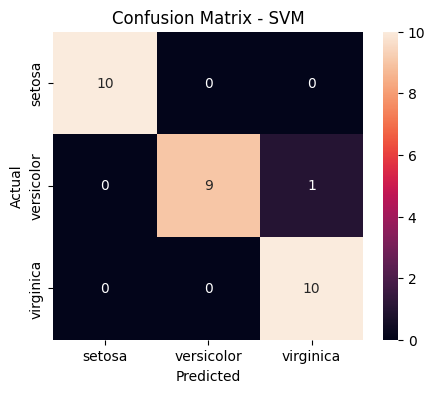

In [9]:
# pick best model by accuracy
best_name = max(results, key=results.get)
best_model = models[best_name]
print("Best model:", best_name)

y_pred = best_model.predict(X_test_scaled)
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# confusion matrix (display nicely)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_name}')
plt.show()


In [10]:
import sys
print(sys.executable)
print(sys.version)


C:\Python313\python.exe
3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]


In [11]:
import sys
!{sys.executable} -m pip install seaborn --upgrade


Defaulting to user installation because normal site-packages is not writeable


In [12]:
import seaborn as sns
print("seaborn version:", sns.__version__)


seaborn version: 0.13.2


In [13]:
# -------------------------------------------------
# Training different ML models and storing results
# -------------------------------------------------

# Dictionary to store models and their accuracy
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    results[name] = acc
    print(f"{name}: {acc:.2f}")


Logistic Regression: 0.93
Decision Tree: 0.93
KNN: 0.93
SVM: 0.97


Best model: SVM

Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



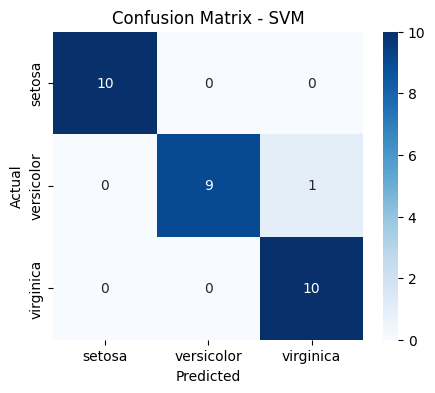

In [14]:
# pick best model by accuracy
best_name = max(results, key=results.get)
best_model = models[best_name]
print("Best model:", best_name)

# predictions
y_pred = best_model.predict(X_test_scaled)

# classification report
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# confusion matrix (with seaborn heatmap)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_name}')
plt.show()
